<a href="https://colab.research.google.com/github/FGalvao77/Machine-Learning/blob/main/Oficina_01_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear Múltipla**

---



Neste notebook aprenderemos como utilizar a biblioteca scikit-learn para construirmos um modelo de previsão de preço, usando regressão linear múltipla. Para isso utilizaremos um conjunto de dados de carros usados listados pelo site www.cardekho.com e disponível em: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho e adaptado neste notebook.

As informações contidas no dataset são:

**nome_carro:**        nome do carro

**ano:**               ano de fabricação

**preco_venda:**       preço que o dono quer vender

**preco_atual:**       preço da concessionária

**kms_rodados:**       kilometragem do carro 

**tipo_combustivel:**  tipo de combustível do carro (Diesel, Gasolina, GasNatural)

**tipo_vendedor:**     se o vendedor é um revendedor ou é a própria pessoa

**tipo_transmissao:**  tipo de câmbio do carro

**n_donos:**           número de donos que o carro já teve

### **Importando bibliotecas necessárias**

---



In [43]:
import pandas as pd               # para modelagem de dados
import numpy as np                # para recursos matemáticos e matrizes
import matplotlib.pyplot as plt   # para gerar visualizações gráficas

# comando "mágico" para renderizar a visualização gráfica
%matplotlib inline

# para ignorar mensagens de erros
import warnings
warnings.filterwarnings('ignore')

### **Carregando os dados**

---



In [2]:
# importando a base de dados para o google colab
# para isso, utilizaremos a biblioteca fornecida pela google
from google.colab import files
uploaded = files.upload()

Saving car_data.csv to car_data.csv


In [44]:
# instanciando a base de dados na variável "df"
df = pd.read_csv('car_data.csv')

# visualzando as 5 primeiras linhas do arquivo
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


### **Tamanho dos nossos registros**

---



In [45]:
# o nosso dataset possui 301 registros de carros usados e 9 colunas
# print(df.shape)
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')

Linhas: 301 | Colunas: 9


In [46]:
# visualizando o tipo de dado em cada coluna
df.dtypes

nome_carro           object
ano                   int64
preco_venda         float64
preco_atual         float64
kms_rodados           int64
tipo_combustivel     object
tipo_vendedor        object
tipo_transmissao     object
n_donos               int64
dtype: object

>> Veja que, as colunas `tipo_combustivel`, `tipo_vendedor` e `tipo_transmissao` foram instanciados com dados do tipo `object` (string), ou melhor dados categóricos. 
  - E os modelos de ML trabalham melhor com dados numéricos e, portanto será necessário realizar um tratamento para as colunas em questão.

### **Para o algoritmo de regressão, vamos substituir os dados que possuem textos por números.** 

---



In [47]:
# aqui estamos referenciando a coluna desejada e, com a função ".replace()" estamos sobrescrevendo o arquivo
# e dentro da função, passando como argumento um dicionário com chave (categoria) e o seu valor (0, 1 ou 2)
df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head() # visualizando as 5 primeiras linhas

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### **Vamos plotar em um gráfico os anos do carros versus o preço de venda.**

---



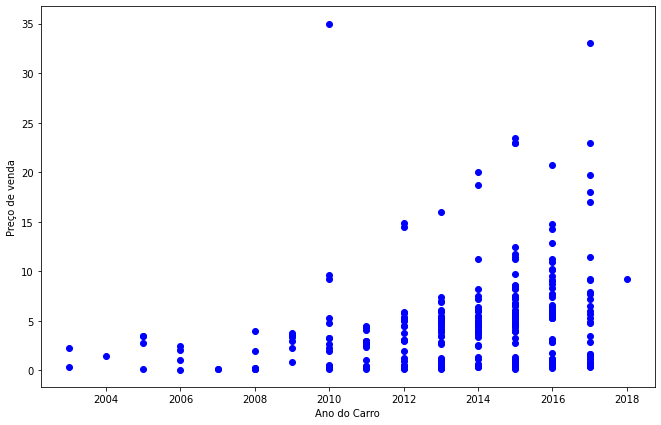

In [48]:
# plotando um gráfico de dispersão das variáveis "ano" vs "preco_venda"
# para essa necessidade, utilizaremos a função ".scatter()" da biblioteca "matplotlib.pyplot"
# configurando o gráfico
plt.figure(figsize=(11,7))
plt.scatter(df['ano'], df['preco_venda'],  color='blue')
plt.xlabel('Ano do Carro')
plt.ylabel('Preço de venda')
plt.show();

### **Agora vamos ver qual os anos dos carros que mais rodaram.**

---



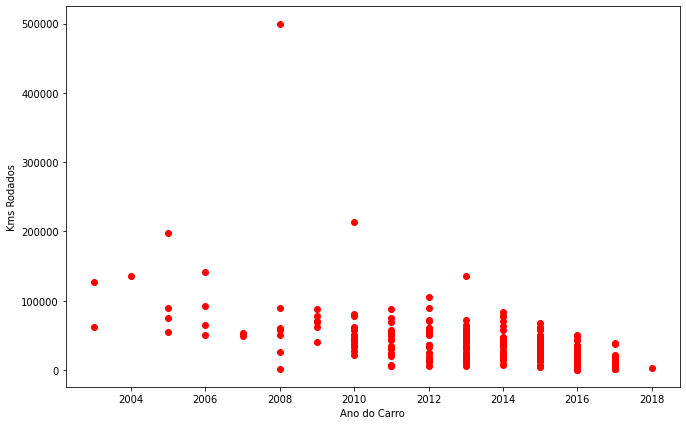

In [49]:
# plotando um gráfico de dispersão das variáveis "ano" vs "kms_rodados"
# para essa necessidade, utilizaremos a função ".scatter()" da biblioteca "matplotlib.pyplot"
# configurando o gráfico
plt.figure(figsize=(11,7))
plt.scatter(df['ano'], df['kms_rodados'],  color='red')
plt.xlabel('Ano do Carro')
plt.ylabel('Kms Rodados')
plt.show();

### **Separando a variável dependente e as variáveis independentes**

---



In [50]:
# instanciando as variáveis independentes na variável "x"
x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']]

In [51]:
# instanciando a variável dependente na variável "y"
y = df[['preco_venda']]

### **Separando os dados em treino e teste**

---



Para construir nosso modelo de Machine Learning precisamos dividir os dados em duas partes. 
  - uma parte para treinar o modelo e,
  - outra para testar o modelo com dados que ele não conhece. 
  
Para isso iremos separar `80% dos dados para treino` e `20%
dos dados para teste`. 
  - para isso usaremos a biblioteca `train_test_split` que faz essa separação automaticamente.

In [52]:
# importando a biblioteca para realizar a separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

# instanciando os dados de treino (x_train e y_train) e teste (x_test e y_test)
# utilizando a função "train_test_split", respeitando a seguinte ordem "x_train, x_test, y_train, y_test"
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2)
                                                    # separando 20% dos dados para teste e o restante, 80% para treino

> - **x_train** é a parte usada para treinar o algoritmo
> - **x_test** é a parte usada para testar o algoritmo depois de treinado
> - **y_train** é a parte das respostas usadas no treino
> - **y_test** é a parte das respostas usadas para testar o algoritmo

In [53]:
# visualizando o número de registros que serão usados para o treino e teste
print('Treino')
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

print('\nTeste')
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

Treino
x_train:  (240, 7)
y_train:  (240, 1)

Teste
x_test:  (61, 7)
y_test:  (61, 1)


### **Treinando o Modelo** 

---



In [54]:
# importando a função "LinearRegression" da biblioteca do "sklearn.linear_model"
from sklearn.linear_model import LinearRegression

# define um modelo de regressão
model = LinearRegression()

# utilizando a função ".fit()" e treinando o modelo com os dados de treino
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Realiza a previsão dos preços**

---



In [55]:
# y_pred contém a previsão dos preços do nosso modelo
y_pred = model.predict(x_test)

In [56]:
# visualizando a quantidade de dados do "y_pred" e "y_test"
print(y_pred.shape)
print(y_test.shape)

(61, 1)
(61, 1)


### **Agora vamos plotar o preço dos carros, previsto pelo modelo versus os dados de teste**

---



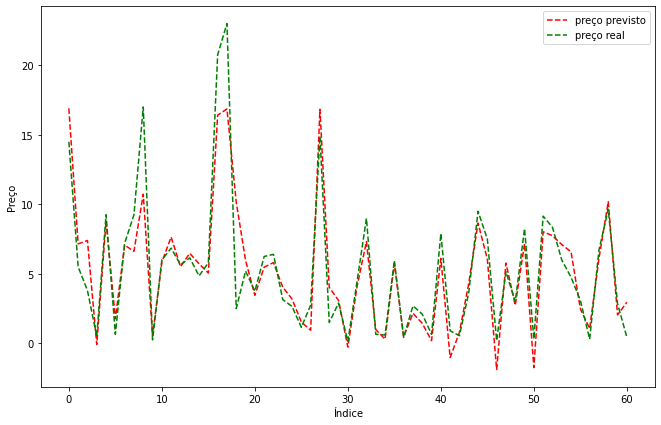

In [57]:
# configurando o gráfico
plt.figure(figsize=(11,7))
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')
plt.show();

É possível observar no gráfico que o modelo, em alguns casos tende a prever preços mais baixos do que o preço real de venda.

Para saber o quanto o nosso modelo está explicando os dados, ou o quanto o modelo pode prever corretamente,
iremos utilizar a medida r2, que é o coeficiente de determinação. Para isso iremos utilizar os dados da resposta
na etapa de teste e os dados de resposta previstos.

In [58]:
# importando a biblioteca "r2_score" para realizar avaliação da previsão do modelo
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.831129922401111


Quanto mais próximo de 1, mais o modelo é capaz de prever corretamente.
Então do resultado acima, colocando em porcentagem podemos dizer que o nosso modelo
prevê corretamente 87% dos preços.

### A**gora é sua vez de Praticar!**

---



Use as variáveis a seguir para fazer as previsões com base no que já foi visto

In [59]:
# instanciando as variáveis independentes na variável "new_x"
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]

# instanciando as variável dependente na variável "new_y"
new_y = df[['preco_venda']]

Separe os dados em dados de treino e teste, e então defina um modelo de regressão e realize as previsões.
- depois use o `r2_score` para saber a nova porcentagem desse modelo. O resultado é melhor ou pior?

In [60]:
# escreva seu código aqui

# importando a biblioteca para realizar a separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

# instanciando os dados de treino (X_train e y_train) e teste (X_test e y_test)
# utilizando a função "train_test_split", respeitando a seguinte ordem "X_train, X_test, y_train, y_test"
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, 
                                                    test_size=0.2)
                                                    # separando 20% dos dados para teste e o restante, 80% para treino

# visualizando o número de registros que serão usados para o treino e teste
print('Treino')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

print('\nTeste')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}\n')

# importando a função "LinearRegression" da biblioteca do "sklearn.linear_model"
from sklearn.linear_model import LinearRegression

# define um modelo de regressão
model = LinearRegression()

# utilizando a função ".fit()" e treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# com a função ".predict()" iremos realizar a previsão dos preços do nosso modelo
y_pred = model.predict(X_test)

# visualizando a quantidade de dados do "y_pred" e "y_test"
print(y_pred.shape)
print(y_test.shape)

Treino
X_train: (240, 4)
y_train: (240, 1)

Teste
X_test: (61, 4)
y_test: (61, 1)

(61, 1)
(61, 1)


In [61]:
# importando a biblioteca "r2_score" para realizar avaliação da previsão do modelo
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.8188447580778992


>> Nosso modelo, ficou com sua performace abaixo do primeiro.
  - podemos avaliar seu desempenho pelo valor do `R2`, que foi de ≅ 82%.

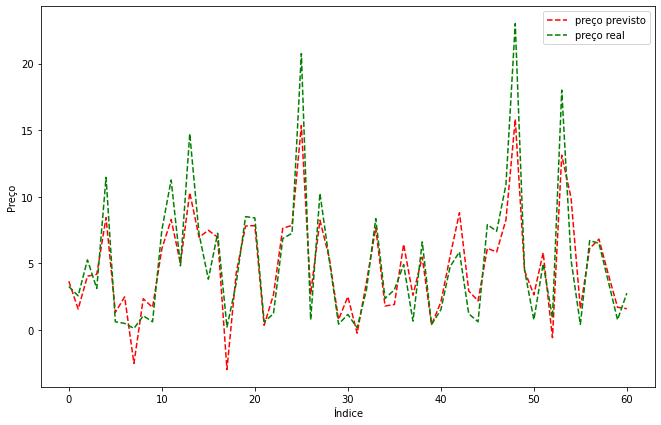

In [62]:
# vamos visualizar de forma gráfica o desempenho do modelo
# plotando e configurando o gráfico
plt.figure(figsize=(11,7))
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')
plt.show();